<a href="https://colab.research.google.com/github/MiguelR0462/Integracion_de_Datos_y_Prospectiva/blob/main/Reto_1_Caracterizacion_de_VA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Caso de Estudio: **Modelamiento de Riesgo - Fintech**

Una fintech quiere estimar las *perdidas* asociadas con el riesgo derivado de los *fallos tecnologicos* en transacciones de sus clientes a traves de sus canales electronicos.

- **Frecuencia:** Indica el numero de transacciones fallidas en el dia que se presenta la falla
- **Valor Generado(MUSD):** Indica el valor promedio de las perdidas generadas por las fallas en millones de USD
- **LDA:** Es el producto de la frecuencia y el costo de las fallas. Caracterizaremos la distribución resultante, usando las medidas de tendencia central (media y desviación) y medidas de dispersión (kurtosis y asimetria)

0. Importamos librerias y cargamos el google drive

In [ ]:
# cargamos las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# montamos el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Cargamos el archivo de trabajo

In [17]:
path = '/content/drive/MyDrive/Universidad/Semestre 8/Integracion de Datos y Prospectiva de Riesgo/Archivos/1. FallasTecnológicas.xlsx'
df = pd.read_excel(path)
df.head()

,Fallas Tecnológicas (Canales Electronicos),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Fechas,Transacciones Diarias,Valor Transado (millones),Transacciones Fallidas (Freq),Valor Generado Promedio (Millones),Descripción Evento
1,2009-01-01 00:00:00,80,14.8058,1,0.5374,"Errores visuales menores, problemas de usabili..."
2,2009-01-02 00:00:00,105,56.4721,4,1.1978,"Errores en la interfaz de usuario, fallas en f..."
3,2009-01-03 00:00:00,70,9.976,5,0.4269,"Errores visuales menores, problemas de usabili..."
4,2009-01-04 00:00:00,105,18.2949,6,1.0814,"Errores en la interfaz de usuario, fallas en f..."


In [18]:
# como el archivo no tiene los nombres correctos de las columnas, usamos la
# fila 1 para renombrar las columnas
df.columns = df.iloc[0]
df = df.drop(df.index[0]).reset_index(drop=True)
df.head()

,Fechas,Transacciones Diarias,Valor Transado (millones),Transacciones Fallidas (Freq),Valor Generado Promedio (Millones),Descripción Evento
0,2009-01-01 00:00:00,80,14.8058,1,0.5374,"Errores visuales menores, problemas de usabili..."
1,2009-01-02 00:00:00,105,56.4721,4,1.1978,"Errores en la interfaz de usuario, fallas en f..."
2,2009-01-03 00:00:00,70,9.976,5,0.4269,"Errores visuales menores, problemas de usabili..."
3,2009-01-04 00:00:00,105,18.2949,6,1.0814,"Errores en la interfaz de usuario, fallas en f..."
4,2009-01-05 00:00:00,130,23.4112,7,1.2105,"Errores en la interfaz de usuario, fallas en f..."


In [19]:
# revisamos si hay datos nulos y los eliminamos
df.isnull().sum()
# Nota: no hay datos nulos en el dataset, entonces no se elimina nada

,0
0,
Fechas,0
Transacciones Diarias,0
Valor Transado (millones),0
Transacciones Fallidas (Freq),0
Valor Generado Promedio (Millones),0
Descripción Evento,0


2. Procedemos con el analisis

<function matplotlib.pyplot.show(close=None, block=None)>

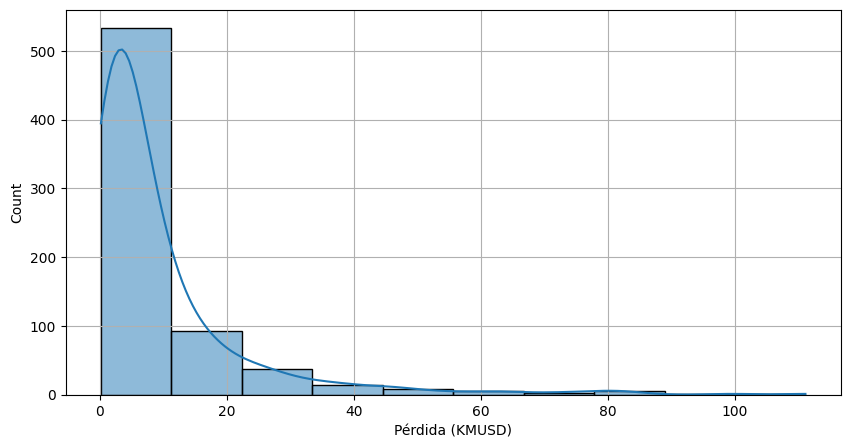

In [ ]:
# calculamos el LDA
freq = df.iloc[:,3]
sev = df.iloc[:,4]
lda = freq*sev
# Seguimos con la construccion de la grafica de la distribucion de agregada de las pérdidas
plt.figure(figsize=(10,5))
sns.histplot(lda, bins=10, kde= True)
plt.xlabel("Pérdida (MUSD)")
plt.grid()
plt.show

3. Hacemos la clusterizacion estadistica

In [ ]:
np.set_printoptions(suppress=True)
NI = 10 # Indica el numero de clusters
counts,bin_edges = np.histogram(lda,bins=NI)
print("El numero de datos por intervalos es:")
print(counts)
print("=========================================")
print("Los intervalos inferiores son:")
print(bin_edges[:-1])
print("=========================================")
print("Los intervalos superiores son:")
print(bin_edges[1:])
XC = (bin_edges[:-1]+bin_edges[1:])/2
print("=========================================")
print("Los centroides de los intervalos son:")
print(XC)

El numero de datos por intervalos es:
[533  93  37  14   9   5   3   5   1   1]
Los intervalos inferiores son:
[ 0.1423  11.23637 22.33044 33.42451 44.51858 55.61265 66.70672 77.80079
 88.89486 99.98893]
Los intervalos superiores son:
[ 11.23637  22.33044  33.42451  44.51858  55.61265  66.70672  77.80079
  88.89486  99.98893 111.083  ]
Los centroides de los intervalos son:
[  5.689335  16.783405  27.877475  38.971545  50.065615  61.159685
  72.253755  83.347825  94.441895 105.535965]


In [ ]:
# creamos una tabla para ordenar los datos
Tabla = np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts))
df = pd.DataFrame(Tabla,columns=['L.Inf','L.Sup','Centroide','Nro. Datos'])
df

,L.Inf,L.Sup,Centroide,Nro. Datos
0,0.14230,11.23637,5.689335,533.0
1,11.23637,22.33044,16.783405,93.0
2,22.33044,33.42451,27.877475,37.0
3,33.42451,44.51858,38.971545,14.0
4,44.51858,55.61265,50.065615,9.0
5,55.61265,66.70672,61.159685,5.0
6,66.70672,77.80079,72.253755,3.0
7,77.80079,88.89486,83.347825,5.0
8,88.89486,99.98893,94.441895,1.0
9,99.98893,111.08300,105.535965,1.0


4. Se calculan las metricas estadisticas de tendencia central y dispersion: Media, desviacion, asimetria y curtosis.

In [ ]:
# La media
u = np.mean(lda)
# La varianza
var = np.var(lda)
# La desviación estándar
sigma = np.std(lda)
# Calculamos el coeficiente de asimetria
from scipy.stats import skew
sk = skew(lda)
# calculamos la curtosis
from scipy.stats import kurtosis
k = kurtosis(lda)


# Creamos la tabla con los estadísticos (ahora todos tienen tamaño 1)
tabla = np.column_stack((u, var, sigma, sk, k))
df2 = pd.DataFrame(tabla, columns=['Media', 'Varianza', 'Desviacion','Asimetria','Curtosis'])
df2

,Media,Varianza,Desviacion,Asimetria,Curtosis
0,9.451113,187.894776,13.707472,3.34836,14.167714


### **Análisis de Riesgo**


A partir de las métricas de tendencia central y dispersión se observa que los datos tienden a concentrarse por debajo de la media de las pérdidas, comportamiento consistente con una distribución altamente asimétrica. El coeficiente de asimetría es positivo y elevado (3.35) lo que nos habla una cola larga hacia la derecha, lo que implica que, en la mayoría de los casos, las pérdidas asociadas a fallas tecnológicas son relativamente bajas y corresponden a eventos frecuentes y esperados (perdidas esperadas o no asegurables como vimos en clase), mientras que los valores altos aparecen de forma aislada y poco recurrente.

Por su parte, el coeficiente de curtosis de 14.17 muestra una distribución, con una alta concentración de observaciones en en los valores bajos y colas pesadas. Esto se ve también en la distribución por intervalos, donde la mayoría de los eventos estan en los rangos inferiores y solo unos pocos alcanzan montos extremos. En resumen, el análisis refuerza la idea de que el riesgo cotidiano está dominado por pérdidas menores, aunque tambien suceden eventos excepcionales de perdidas significativas

**Posibles Mejoras**
Si se estandarizara el nivel de riesgo junto con el nivel de gestión, entonces podriamos agregar los costos adicionales mencionados como capacitacion de personal, mantenimiento de sistemas, etc. Asi, tendriamos una comprensión mayor de las perdidas generadas por estos fallos. Para hacerlo, posiblemente podriamos crear un modelo de clusterizacion en base a texto porque el texto en la descripcion del fallo es consistente y estandarizado y categorizar cada descripcion del fallo con un nivel de restion correspondiente.